In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
import scipy
from scipy import interpolate
import scipy.integrate as si
import pandas as pd

from pylab import imshow,cm
from matplotlib.colors import LogNorm

In [64]:
corr_3D_hr60 = np.loadtxt('./corr_3D_ps_highres_nbin60.txt',unpack=True)
pi_hr60      = corr_3D_hr60[0,:60]
sigma_hr60   = corr_3D_hr60[1,::60]
# print sigma_hr60
corr_3D_hr_60_reshape = np.reshape(corr_3D_hr60[2],(20,60))
print corr_3D_hr_60_reshape.shape

corr_3D_hr60_fkp = np.loadtxt('./corr_3D_ps_highres_nbin60_fkp.txt',unpack=True)
pi_hr60_fkp      = corr_3D_hr60_fkp[0,:60]
sigma_hr60_fkp   = corr_3D_hr60_fkp[1,::60]
# print sigma_hr60_fkp
corr_3D_hr_60_fkp_reshape = np.reshape(corr_3D_hr60_fkp[2],(20,60))
print corr_3D_hr_60_fkp_reshape.shape

(20, 60)
(20, 60)


In [65]:
print corr_3D_hr_60_reshape[0,0], corr_3D_hr_60_reshape[0,1]
print corr_3D_hr_60_fkp_reshape[0,0], corr_3D_hr_60_fkp_reshape[0,1]

35.98295 19.87932
58.07739 23.16299


In [4]:
# mycorr = np.zeros((20,60))
# for isig,sigi in enumerate(sigma_hr60):
#     for ip, pi in enumerate(pi_hr60):
#         mycorr[isig,ip] = corr_3D_hr60[2,isig*60+ip]
# print mycorr[0,0], mycorr[0,1], corr_3D_hr_60_reshape[0,0], corr_3D_hr_60_reshape[0,1]

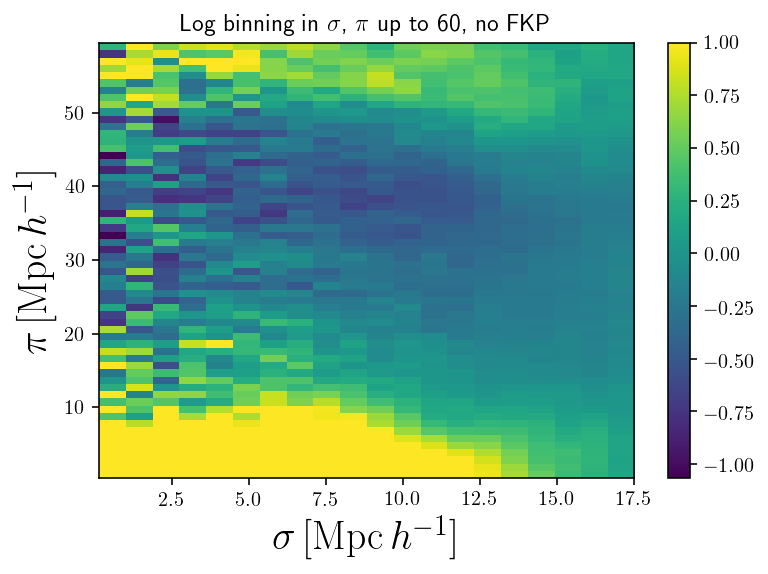

In [66]:
plt.imshow((corr_3D_hr_60_reshape).T,origin='lower',\
           aspect='auto',extent=[(sigma_hr60.min()),(sigma_hr60.max()),pi_hr60.min(),pi_hr60.max()],vmax=1)#,\
#           norm=LogNorm(vmin = 1e-1, vmax=1))
plt.colorbar()
plt.ylabel('$\\pi\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.title('Log binning in $\\sigma$, $\\pi$ up to 60, no FKP')

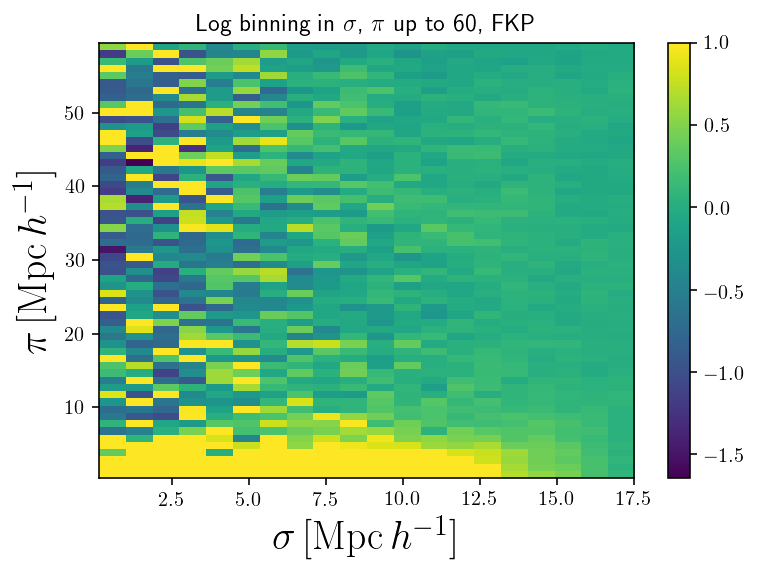

In [67]:
plt.imshow((corr_3D_hr_60_fkp_reshape).T,origin='lower',\
           aspect='auto',extent=[(sigma_hr60_fkp.min()),(sigma_hr60_fkp.max()),pi_hr60_fkp.min(),pi_hr60_fkp.max()],vmax=1)#,\
#           norm=LogNorm(vmin = 1e-1, vmax=1))
plt.colorbar()
plt.ylabel('$\\pi\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.title('Log binning in $\\sigma$, $\\pi$ up to 60, FKP')

In [68]:
# Sig_sig = 2.*np.sum(mycorr[:,np.where(pi_hr60<30.)[0]],axis=1)
Sig_sig     = 2.*np.sum(corr_3D_hr_60_reshape[:,np.where(pi_hr60<30.)[0]],axis=1)
Sig_sig_fkp = 2.*np.sum(corr_3D_hr_60_fkp_reshape[:,np.where(pi_hr60_fkp<30.)[0]],axis=1)

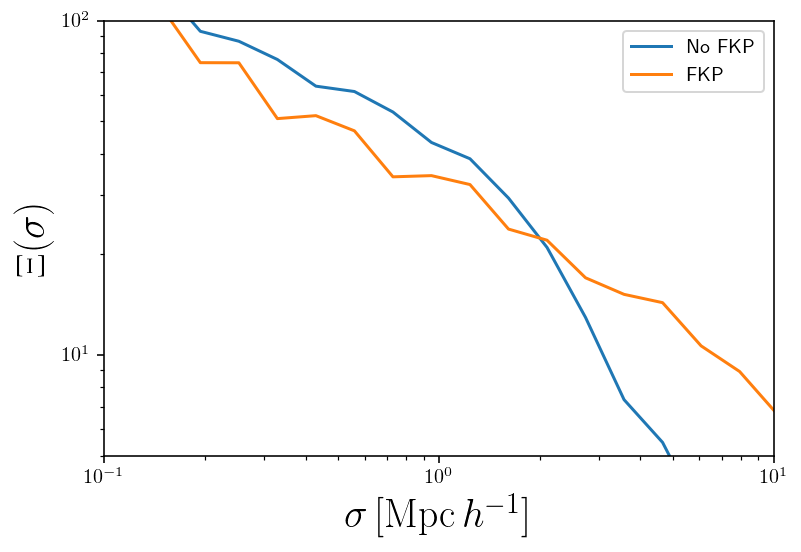

In [69]:
plt.plot(sigma_hr60,Sig_sig, label = 'No FKP')
plt.plot(sigma_hr60_fkp,Sig_sig_fkp, label = 'FKP')
plt.loglog() 
plt.xlim([0.1,10])
plt.ylim([5,100])
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\Xi(\\sigma)$',fontsize=20)
plt.legend(loc=0)

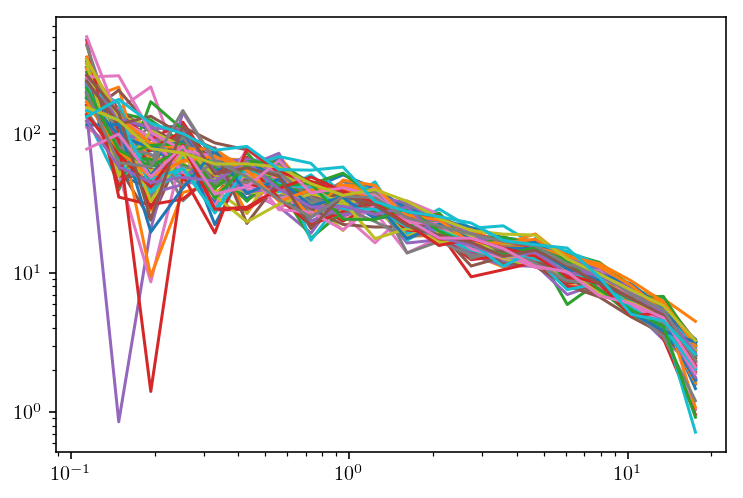

In [70]:
# bootstrap
n_samples = 70
Sig_sig_boot = np.zeros((n_samples,sigma_hr60.size))
for i in xrange(0,n_samples):
    corr_ = np.loadtxt('./bootstrap/corr_3D_ps_highres_nbin60_fkp_%s.txt'%i,unpack=True)
    corr_reshape_ = np.reshape(corr_[2],(20,60))
    Sig_sig_boot[i,:] = 2.*np.sum(corr_reshape_[:,np.where(pi_hr60_fkp<30.)[0]],axis=1)
    plt.loglog(sigma_hr60_fkp,Sig_sig_boot[i,:])

In [71]:
sig_sig_errors = np.std(Sig_sig_boot,axis=0)

In [72]:
print sig_sig_errors

[ 86.47163033  45.63297722  38.09869892  24.84053557  15.35565841
  13.62809262  10.43575765   8.75709246   7.35876316   5.65023439
   4.2663934    3.12644392   2.38532068   2.06122111   1.89639979
   1.77167125   1.35296124   0.9166219    0.82357143   0.69584718]


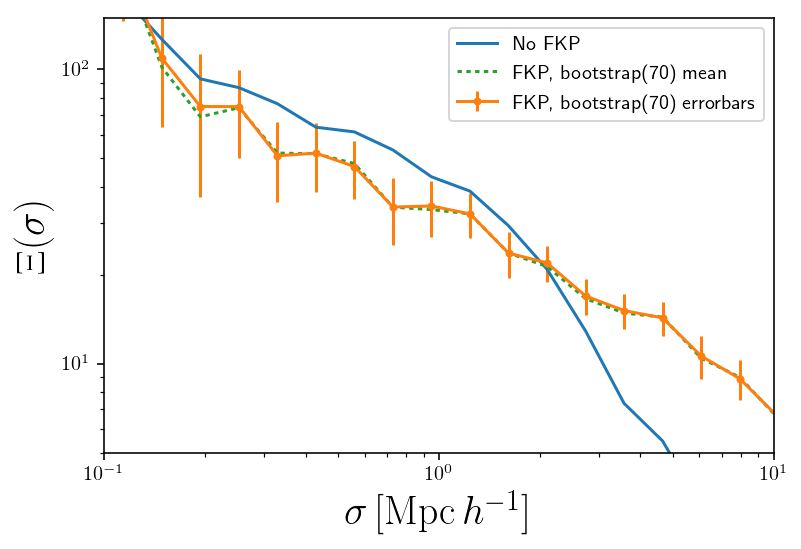

In [73]:
plt.plot(sigma_hr60,Sig_sig, label = 'No FKP')
plt.errorbar(sigma_hr60_fkp,Sig_sig_fkp,yerr=sig_sig_errors, marker='.', label = 'FKP, bootstrap(%s) errorbars'%n_samples)
plt.plot(sigma_hr60_fkp,np.mean(Sig_sig_boot,axis=0), ':', label = 'FKP, bootstrap(%s) mean'%n_samples)
plt.loglog() 
plt.xlim([0.1,10])
plt.ylim([5,150])
plt.xlabel('$\\sigma\,[\\mathrm{Mpc}\,h^{-1}]$',fontsize=20)
plt.ylabel('$\\Xi(\\sigma)$',fontsize=20)
plt.legend(loc=0)